In [13]:
import numpy as np
from skimage import color, restoration
import matplotlib.pyplot as plt
from skimage.restoration import wiener
from scipy.signal import convolve2d
import cv2

In [2]:
#Testing wiener deconvoltion, appears to be a way to restore original image after blur
#requires psf, which requires additional calculation, not very sure about it, seem to be more applicable to microscopes
#abandon for now, unable to proceed as need to calculate psf as part of deconvoltion


def wiener_filter(img):
    
    rng = np.random.default_rng()

    psf = np.ones((5, 5)) / 25
    img = convolve2d(img, psf, 'same')
    img += 0.1 * img.std() * rng.standard_normal(img.shape)

    deconvolved, _ = restoration.unsupervised_wiener(img, psf)
    
    # psf = np.ones((5, 5)) / 25
    # img = convolve2d(img, psf, 'same')
    # rng = np.random.default_rng()
    # img += 0.1 * img.std() * rng.standard_normal(img.shape)
    # deconvolved_img = wiener(img, psf, 1100)
    
    return deconvolved

Algorithm based on "Noise Removed by Processing the Lightness and Chromatic Components Basic on YCbCr Color Space" in https://www.researchgate.net/publication/338901649_Noise_removed_by_processing_the_lightness_and_chromatic_components_basic_on_YCbCr_color_space_YCbCr_azalt_aldwda_n_tryq_maljt_mrkbat_aladah_walalwan_baskhdam_alfda_allwny

In [11]:
img = cv2.imread("fire_150.png")

#transform to ycc
transcol=cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

#transcoltest=cv2.cvtColor(img, cv2.COLOR_YCR_CB2BGR)

#y-extraction 
y_component = transcol[:,:,0]

y_deconvolved = wiener_filter(y_component)

#get r,g,b deconvolved
b_deconvolved = wiener_filter(img[:,:,0])

g_deconvolved = wiener_filter(img[:,:,1])

r_deconvolved = wiener_filter(img[:,:,2])

rgb = np.dstack((b_deconvolved,g_deconvolved,r_deconvolved))

#rgb = cv2.imread("rgb", rgb.astype(np.uint8))

print(rgb.shape)
#transform to ycc
rgb_deconvolved = cv2.cvtColor(rgb.astype('float32'), cv2.COLOR_BGR2YCR_CB)

#cr_cb extraction
cr_deconvolved = rgb_deconvolved[:,:,1]
cb_deconvolved = rgb_deconvolved[:,:,2]

ycr_cb_deconvolved =  np.dstack((y_deconvolved,cr_deconvolved,cb_deconvolved))

#return to rgb 
image_rgb = cv2.cvtColor(ycr_cb_deconvolved.astype('float32'), cv2.COLOR_YCR_CB2RGB)

(450, 878, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


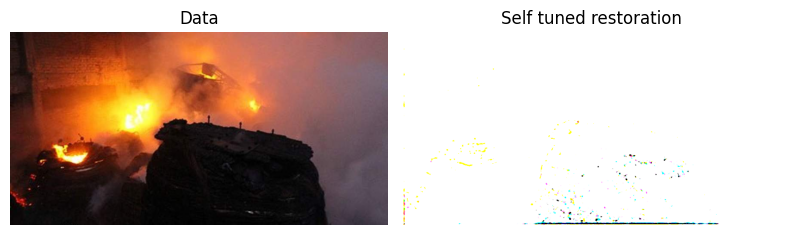

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

#plt.gray()

ax[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(image_rgb)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

#?????????? HUH ???????????

In [99]:
y_component

array([[ 97,  97,  98, ...,  92,  97,  95],
       [ 97,  98,  98, ...,  90,  95,  95],
       [ 98,  98,  98, ...,  92,  96,  94],
       ...,
       [135, 135, 134, ..., 124, 122, 123],
       [136, 135, 135, ..., 122, 120, 120],
       [136, 136, 135, ..., 122, 120, 120]], dtype=uint8)

In [100]:
cv2.imshow('',y_deconvolved)
cv2.waitKey(1)

-1

In [16]:
img = cv2.imread("chenshuo.png")

#transform to ycc
transcol=cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)

transcoltest=cv2.cvtColor(transcol, cv2.COLOR_YCR_CB2RGB)

In [18]:
cv2.imshow('',transcoltest)
cv2.waitKey(1)

-1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


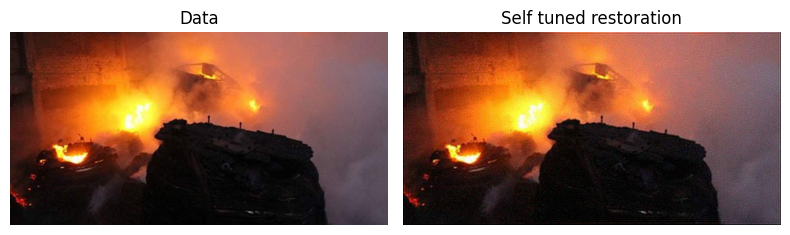

In [8]:


from skimage import color, data, restoration

img = cv2.imread("fire_150.png")

b = img[:,:,0] / 255
g = img[:,:,1] / 255
r = img[:,:,2] / 255

from scipy.signal import convolve2d as conv2

rng = np.random.default_rng()

def wiener_test(img):
    
    psf = np.ones((5, 5)) / 25
    img = conv2(img, psf, 'same')
    img += 0.1 * img.std() * rng.standard_normal(img.shape)

    deconvolved, _ = restoration.unsupervised_wiener(img, psf)
    
    
    # psf = np.ones((15, 15)) / 25
    # img = convolve2d(img, psf, 'same')
    # rng = np.random.default_rng()
    # img += 0.1 * img.std() * rng.standard_normal(img.shape)
    # deconvolved_img = restoration.wiener(img, psf, 1100)
    
    
    return deconvolved

b_channel = wiener_test(b)
g_channel = wiener_test(g)
r_channel = wiener_test(r)

img_rgb = np.dstack((r_channel,g_channel,b_channel))


#deconvolved = cv2.cvtColor(deconvolved.astype(np.uint8),cv2.COLOR_GRAY2RGB)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

#plt.gray()

ax[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(img_rgb)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

#difference?

In [91]:
cv2.imshow('',img_rgb)
cv2.waitKey(1)

-1